# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [56]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

In [57]:
cities


['libreville',
 'khatanga',
 'hermanus',
 'kaitangata',
 'bluff',
 'bubaque',
 'taolanaro',
 'soe',
 'richards bay',
 'pevek',
 'pascagoula',
 'punta arenas',
 'tahta',
 'dikson',
 'hasaki',
 'illoqqortoormiut',
 'klimovo',
 'kondinskoye',
 'salinopolis',
 'abalak',
 'rikitea',
 'port alfred',
 'urucara',
 'faridpur',
 'longyearbyen',
 'leningradskiy',
 'fairbanks',
 'soyo',
 'aguimes',
 'thompson',
 'beloha',
 'taltal',
 'mayya',
 'hilo',
 'lephepe',
 'ushuaia',
 'hobart',
 'puerto ayora',
 'yellowknife',
 'shizunai',
 'cape town',
 'vaini',
 'chokurdakh',
 'tuatapere',
 'kodiak',
 'albany',
 'dadu',
 'assomada',
 'meyungs',
 'jieshi',
 'mirabad',
 'atuona',
 'new norfolk',
 'saint-denis',
 'koutiala',
 'san patricio',
 'padang',
 'torres',
 'upernavik',
 'belushya guba',
 'georgetown',
 'altamont',
 'fort nelson',
 'saint-philippe',
 'saskylakh',
 'codrington',
 'pouembout',
 'esperance',
 'saint anthony',
 'ribeira grande',
 'galveston',
 'hithadhoo',
 'butaritari',
 'grindavik',
 '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [86]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_name=[]
city_id =[]
lat=[]
long=[]
temp=[]
clouds=[]
humidity=[]
wind_speed=[]


for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units="+ 'imperial'
    weather_response1 = requests.get(query_url)
    weather1_json = weather_response1.json()
    try:
        city_name.append(weather1_json['name'])
        city_id.append(weather1_json['id'])
        temp.append(weather1_json['main']['temp'])
        lat.append(weather1_json['coord']['lat'])
        long.append(weather1_json['coord']['lon'])
        clouds.append(weather1_json['clouds']['all'])
        humidity.append(weather1_json['main']['humidity'])
        wind_speed.append(weather1_json['wind']['speed'])
        print(f"{city}: {weather1_json['id']}")
    except KeyError:
        print(f"City{city} is not available")
        

libreville: 2399697
khatanga: 2022572
hermanus: 3366880
kaitangata: 2208248
bluff: 2206939
bubaque: 2374583
Citytaolanaro is not available
soe: 1626703
richards bay: 962367
pevek: 2122090
pascagoula: 4440397
punta arenas: 3874787
tahta: 347634
dikson: 1507390
hasaki: 2112802
Cityilloqqortoormiut is not available
klimovo: 547591
kondinskoye: 1502697
salinopolis: 3389822
abalak: 1512223
rikitea: 4030556
port alfred: 964432
urucara: 3385670
faridpur: 1203344
longyearbyen: 2729907
leningradskiy: 2123814
fairbanks: 5861897
soyo: 2236967
aguimes: 2522325
thompson: 6165406
beloha: 1067565
taltal: 3870243
mayya: 2020121
hilo: 5855927
Citylephepe is not available
ushuaia: 3833367
hobart: 2163355
puerto ayora: 3652764
yellowknife: 6185377
shizunai: 2128025
cape town: 3369157
vaini: 4032243
chokurdakh: 2126123
tuatapere: 2180815
kodiak: 5866583
albany: 5106841
dadu: 1180809
assomada: 3374888
Citymeyungs is not available
jieshi: 1805857
mirabad: 1133310
atuona: 4020109
new norfolk: 2155415
saint-d

chor: 1181022
san quintin: 3984997
chicama: 3698359
dashitou: 2037820
calama: 3897347
kudahuvadhoo: 1337607
Cityalotau is not available
viedma: 3832899
naze: 1855540
lamesa: 5524849
luwuk: 1637001
marsa matruh: 352733
broome: 5110365
saint-augustin: 6137462
ikalamavony: 1064258
elko: 5703673
bandarbeyla: 64814
grand gaube: 934479
mehamn: 778707
yefremov: 468390
cidreira: 3466165
skjervoy: 777682
wajir: 178443
shingu: 1847947
guerrero negro: 4021858
sola: 2134814
tateyama: 1850523
ossora: 2122389
matara: 1235846
sibu: 1735902
colares: 2269142
inhambane: 1045114
Citytsihombe is not available
southbridge: 4951594
lorengau: 2092164
maragogi: 3395458
sao jose da coroa grande: 3388456
camacha: 2270385
hualmay: 3939761
zhigansk: 2012530
tessalit: 2449893
mandurah: 2067119
nelson bay: 2155562
reforma: 3520406
lasa: 3175096
derzhavinsk: 1524606
riyadh: 108410
bayan: 2038421
laguna: 5364271
orotukan: 2122414
kavieng: 2094342
allada: 2395635
bathsheba: 3374083
tiznit: 2527087
safranbolu: 740430
m

In [87]:
len(city_name)

544

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [92]:
weather_dict={'city': city_name,
           'city_id':city_id,
           'latitude': lat,
           'longitude': long,
           'temperature': temp,
           'cloudiness': clouds,
           'humidity':humidity,
           'wind_speed':wind_speed}
weather_dict
weather_df=pd.DataFrame(weather_dict)
weather_df.to_csv(r'weather_search.csv')
weather_df

,city,city_id,latitude,longitude,temperature,cloudiness,humidity,wind_speed
0,Libreville,2399697,0.3925,9.4537,75.60,100,89,8.01
1,Khatanga,2022572,71.9667,102.5000,25.77,99,93,14.97
2,Hermanus,3366880,-34.4187,19.2345,60.01,0,83,1.99
3,Kaitangata,2208248,-46.2817,169.8464,55.00,100,80,1.99
4,Bluff,2206939,-46.6000,168.3333,55.00,100,81,7.00
...,...,...,...,...,...,...,...,...
539,Vitim,2013375,59.4511,112.5578,28.45,100,91,12.03
540,Aljezur,2271968,37.3191,-8.8033,58.80,100,75,4.16
541,Ekimchan,2024461,53.0667,132.9667,37.69,100,77,9.26
542,Adamantina,3473157,-21.6853,-51.0725,73.40,0,49,9.22


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [106]:
len(weather_df.loc[weather_df['humidity']>100])

0

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Temperature vs. Latitude')

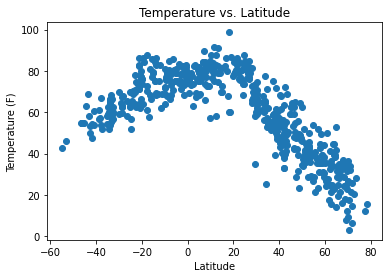

In [118]:
x=weather_df['latitude']
y=weather_df['temperature']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs. Latitude")

## Latitude vs. Humidity Plot

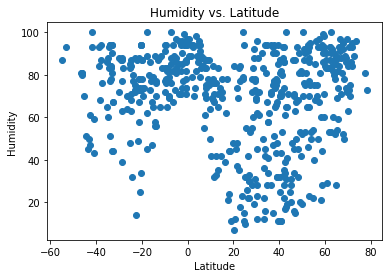

In [122]:
x=weather_df['latitude']
y=weather_df['humidity']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude")
plt.show()

## Latitude vs. Cloudiness Plot

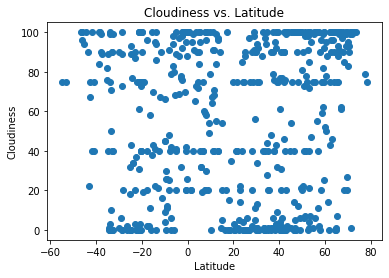

In [123]:
x=weather_df['latitude']
y=weather_df['cloudiness']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude")
plt.show()

## Latitude vs. Wind Speed Plot

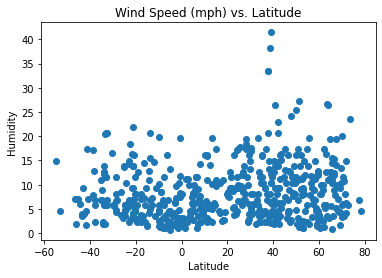

In [125]:
x=weather_df['latitude']
y=weather_df['wind_speed']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Wind Speed (mph) vs. Latitude")
plt.show()

## Linear Regression

In [133]:
northern_hem_df = weather_df.loc[weather_df['latitude']>=0]
#northern_hem_df

southern_hem_df = weather_df.loc[weather_df['latitude']<=0]
southern_hem_df

,city,city_id,latitude,longitude,temperature,cloudiness,humidity,wind_speed
2,Hermanus,3366880,-34.4187,19.2345,60.01,0,83,1.99
3,Kaitangata,2208248,-46.2817,169.8464,55.00,100,80,1.99
4,Bluff,2206939,-46.6000,168.3333,55.00,100,81,7.00
6,Soe,1626703,-9.8607,124.2840,72.09,9,72,2.46
7,Richards Bay,962367,-28.7830,32.0377,67.12,89,88,6.73
...,...,...,...,...,...,...,...,...
525,Byron Bay,2172880,-28.6500,153.6167,62.46,0,39,11.50
527,Murchison,2186377,-41.8000,172.3333,54.36,100,93,1.72
531,Santa Isabel Rio Negro,3662489,-0.4139,-65.0192,74.97,88,96,1.68
542,Adamantina,3473157,-21.6853,-51.0725,73.40,0,49,9.22


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

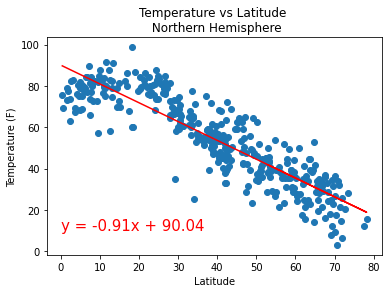

In [139]:
x=northern_hem_df['latitude']
y=northern_hem_df['temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Temperature vs Latitude \n Northern Hemisphere")
plt.annotate(line_eq,(0,10),fontsize=15,color='red')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

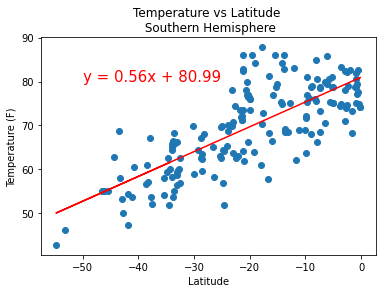

In [146]:
x=southern_hem_df['latitude']
y=southern_hem_df['temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Temperature vs Latitude \n Southern Hemisphere")
plt.annotate(line_eq,(-50,80),fontsize=15,color='red')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

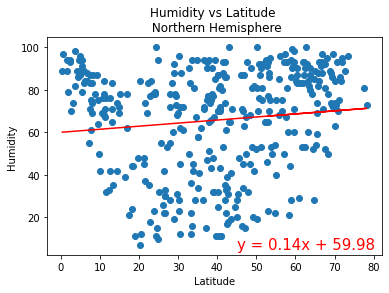

In [147]:
x=northern_hem_df['latitude']
y=northern_hem_df['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Humidity vs Latitude \n Northern Hemisphere")
plt.annotate(line_eq,(45,5),fontsize=15,color='red')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

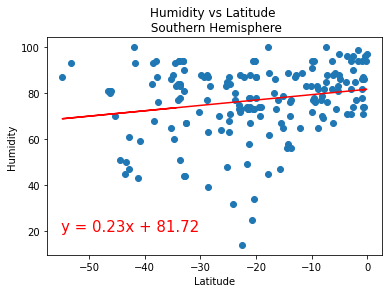

In [150]:
x=southern_hem_df['latitude']
y=southern_hem_df['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Humidity vs Latitude \n Southern Hemisphere")
plt.annotate(line_eq,(-55,20),fontsize=15,color='red')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

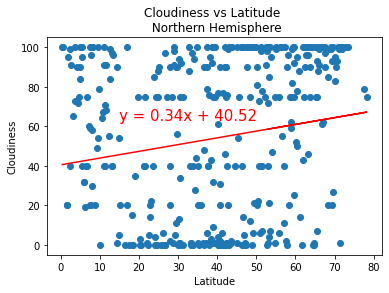

In [157]:
x=northern_hem_df['latitude']
y=northern_hem_df['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Cloudiness vs Latitude \n Northern Hemisphere")
plt.annotate(line_eq,(15,63),fontsize=15,color='red')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

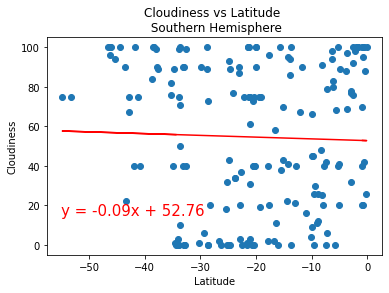

In [159]:
x=southern_hem_df['latitude']
y=southern_hem_df['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Cloudiness vs Latitude \n Southern Hemisphere")
plt.annotate(line_eq,(-55,15),fontsize=15,color='red')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

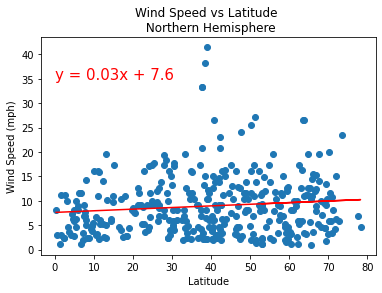

In [161]:
x=northern_hem_df['latitude']
y=northern_hem_df['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Wind Speed vs Latitude \n Northern Hemisphere")
plt.annotate(line_eq,(0,35),fontsize=15,color='red')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

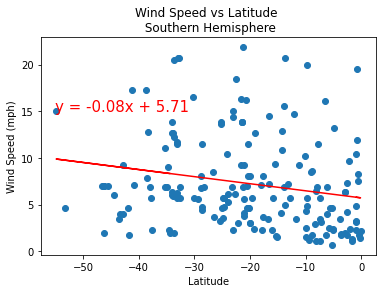

In [167]:
x=southern_hem_df['latitude']
y=southern_hem_df['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Wind Speed vs Latitude \n Southern Hemisphere")
plt.annotate(line_eq,(-55,15),fontsize=15,color='red')
plt.show()